In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report

In [3]:
# LOADING DATA SET

df = pd.read_csv("dataset.csv")

def preprocess_text(text):
    return text.lower()
df["text"] = df["text"].apply(preprocess_text)

In [4]:
# CONVERTING TO FAST TEXT

from gensim.models import FastText
from gensim.utils import simple_preprocess

sentences = [simple_preprocess(text) for text in df["text"]]
fasttext_model = FastText(sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)

def get_fasttext_embedding(text):
    words = simple_preprocess(text)
    vectors = [fasttext_model.wv[word] for word in words if word in fasttext_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X = np.array([get_fasttext_embedding(text) for text in df["text"]])
y = df["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = X_train.astype("float64")
X_test = X_test.astype("float64")
print("Done !")

Done !


In [7]:
# CLASSIFIERS

models = {
    "DECISION TREE": DecisionTreeClassifier(),
    "RANDOM FOREST": RandomForestClassifier(),
    "SVM": SVC(),
    "NAIVE BAYES": GaussianNB(),
    "LOGISTIC REGRESSION": LogisticRegression()
}
# STORING RESULTS

accuracy_results={}
time_results={}

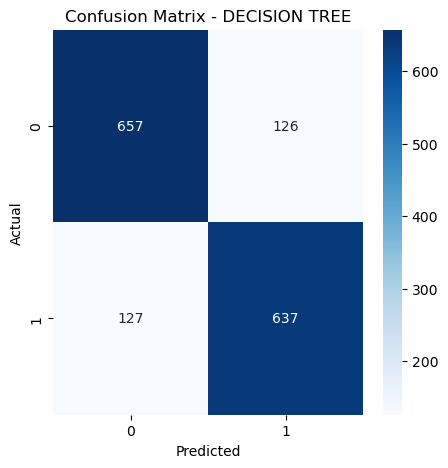

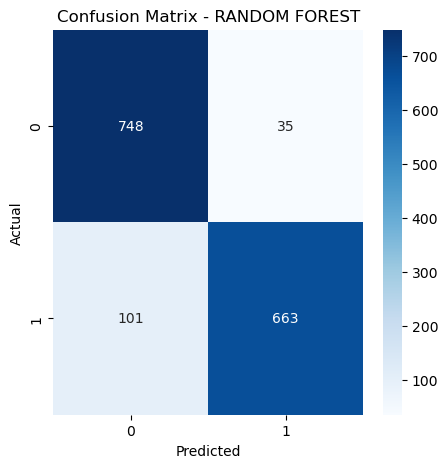

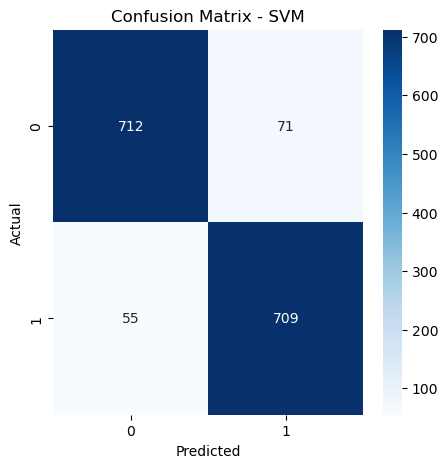

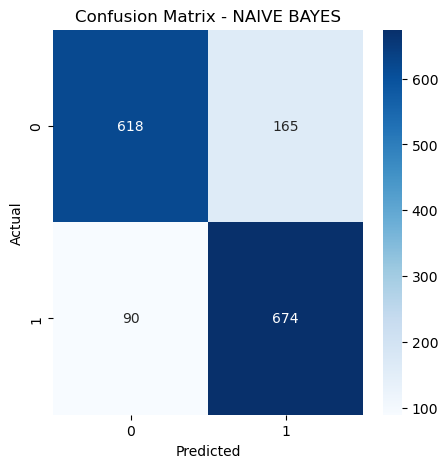

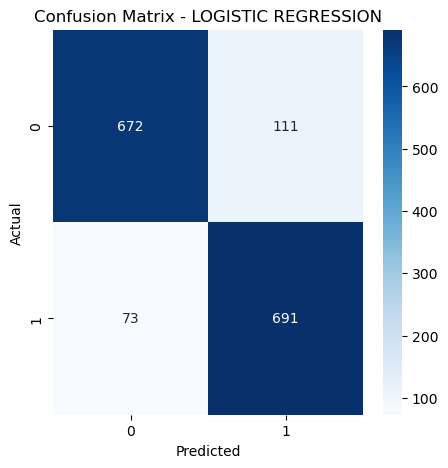


Summary Table of Results:
+---------------------+------------+-------------------+
| Model               |   Accuracy | Prediction Time   |
+=====================+============+===================+
| DECISION TREE       |     0.8365 | 1.0489 sec        |
+---------------------+------------+-------------------+
| RANDOM FOREST       |     0.9121 | 6.5668 sec        |
+---------------------+------------+-------------------+
| SVM                 |     0.9186 | 1.6386 sec        |
+---------------------+------------+-------------------+
| NAIVE BAYES         |     0.8352 | 0.0148 sec        |
+---------------------+------------+-------------------+
| LOGISTIC REGRESSION |     0.8811 | 0.0226 sec        |
+---------------------+------------+-------------------+

Classification Report - DECISION TREE
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+=====

In [8]:
# Classification report

from tabulate import tabulate

results_table = []
classification_reports = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()

    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    time_results[name] = end_time - start_time

    # Store results in a list for table display
    results_table.append([name, f"{acc:.4f}", f"{time_results[name]:.4f} sec"])

    # Store classification report in a structured way
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).T
    classification_reports[name] = df_report

    # Display Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    print("==============================================================")

# Display the summary table with box and outlines
print("\nSummary Table of Results:")
print(tabulate(results_table, headers=["Model", "Accuracy", "Prediction Time"], tablefmt="grid"))

# Display classification reports with outlines
for name, df in classification_reports.items():
    print(f"\nClassification Report - {name}")
    print(tabulate(df.round(4), headers="keys", tablefmt="grid"))
    print("--------------------------------------------------------------")

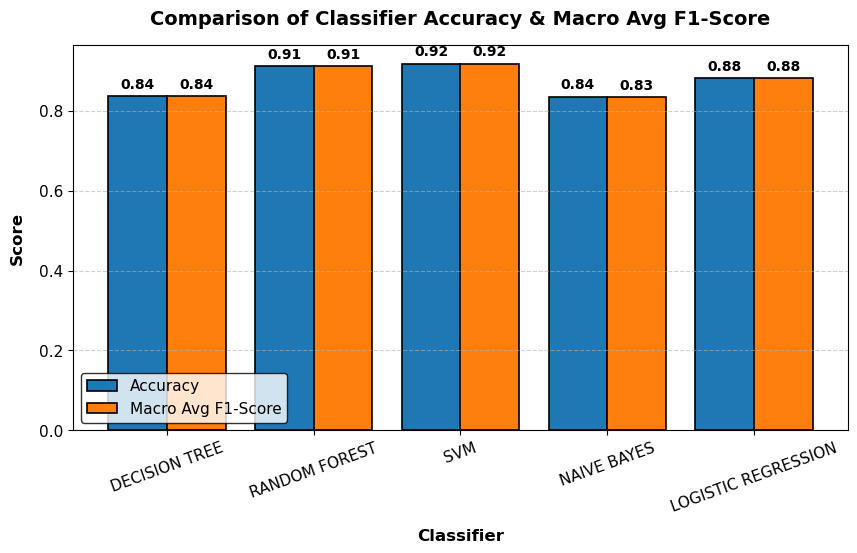

In [9]:
# Comparison of Classifier Accuracy & Macro Avg F1-Score

# Extract macro avg from classification reports
macro_avg_results = {}

for name, model in models.items():
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    macro_avg_results[name] = report["macro avg"]["f1-score"]

# Define bar width and positions
bar_width = 0.4  
x_labels = list(accuracy_results.keys())
x = np.arange(len(x_labels))

# Create figure and axis
plt.figure(figsize=(10, 5))

# Plot bars for Accuracy and Macro Avg F1-score
bars1 = plt.bar(x - bar_width/2, accuracy_results.values(), bar_width, label="Accuracy", color='#1f77b4', edgecolor='black', linewidth=1.2)
bars2 = plt.bar(x + bar_width/2, macro_avg_results.values(), bar_width, label="Macro Avg F1-Score", color='#ff7f0e', edgecolor='black', linewidth=1.2)

# Add labels slightly above bars to prevent overlap
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f"{bar.get_height():.2f}", ha='center', fontsize=10, fontweight='bold')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f"{bar.get_height():.2f}", ha='center', fontsize=10, fontweight='bold')

# Formatting the graph
plt.xlabel("Classifier", fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel("Score", fontsize=12, fontweight='bold', labelpad=10)
plt.title("Comparison of Classifier Accuracy & Macro Avg F1-Score", fontsize=14, fontweight='bold', pad=15)
plt.xticks(x, x_labels, rotation=20, fontsize=11)
plt.yticks(fontsize=11)

# Place the legend in the bottom left
plt.legend(fontsize=11, loc="lower left", frameon=True, edgecolor="black")

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the graph
plt.show()


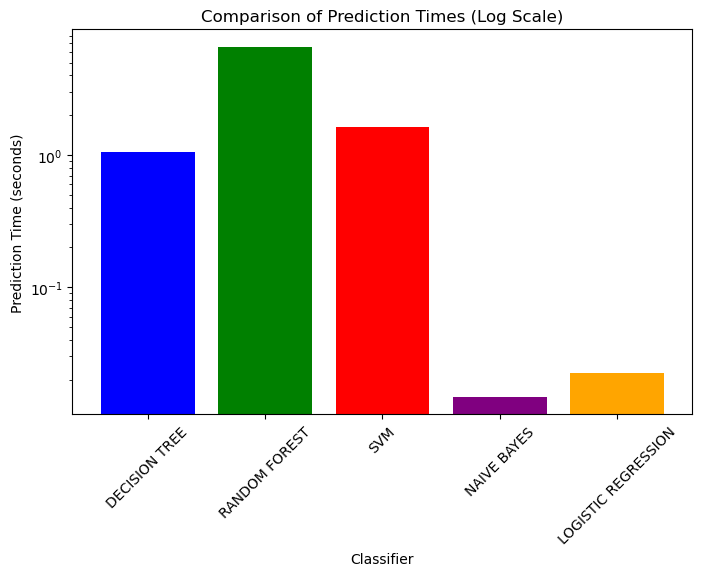


Final Results Table:

+---------------------+------------+----------+------------+-----------------------------+
| Classifier          |   Accuracy |   Recall |   F1-Score |   Prediction Time (seconds) |
+=====================+============+==========+============+=============================+
| DECISION TREE       |     0.8365 |   0.8364 |     0.8364 |                    1.04888  |
+---------------------+------------+----------+------------+-----------------------------+
| RANDOM FOREST       |     0.9121 |   0.9116 |     0.9118 |                    6.56678  |
+---------------------+------------+----------+------------+-----------------------------+
| SVM                 |     0.9186 |   0.9187 |     0.9186 |                    1.6386   |
+---------------------+------------+----------+------------+-----------------------------+
| NAIVE BAYES         |     0.8352 |   0.8357 |     0.8349 |                    0.014801 |
+---------------------+------------+----------+------------+-------

In [10]:
from tabulate import tabulate

# COMPARING RESULTS (Prediction Time Bar Chart)
plt.figure(figsize=(8,5))
plt.bar(time_results.keys(), time_results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Classifier")
plt.ylabel("Prediction Time (seconds)")
plt.title("Comparison of Prediction Times (Log Scale)")
plt.xticks(rotation=45)
plt.yscale("log")
plt.show()

# Collecting Recall & F1-Score
recall_results = {}
f1_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    recall_results[name] = report["macro avg"]["recall"]
    f1_results[name] = report["macro avg"]["f1-score"]

# Display results in a structured table
headers = ["Classifier", "Accuracy", "Recall", "F1-Score", "Prediction Time (seconds)"]
table = []

for name in accuracy_results.keys():
    row = [
        name, 
        f"{accuracy_results[name]:.4f}", 
        f"{recall_results[name]:.4f}", 
        f"{f1_results[name]:.4f}", 
        f"{time_results[name]:.6f}"
    ]
    table.append(row)

print("\nFinal Results Table:\n")
print(tabulate(table, headers=headers, tablefmt="grid"))


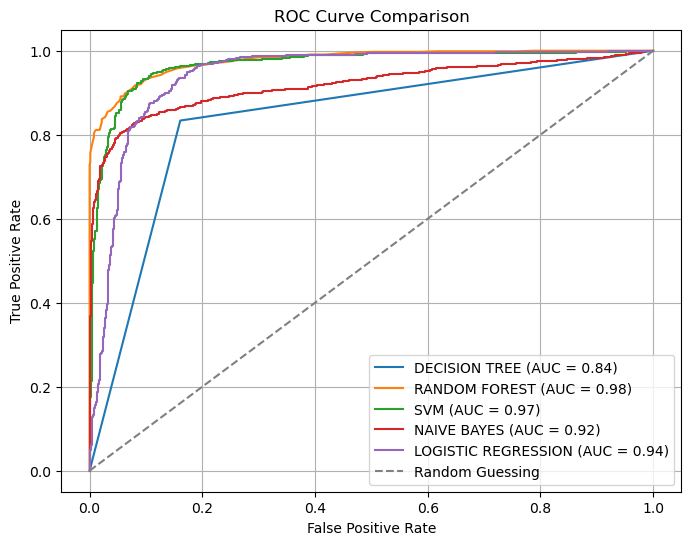

In [11]:
# R O C  CURVE


plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Get prediction probabilities (if model supports it)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
    else:
        # For SVM or models that don’t support predict_proba, use decision_function
        y_proba = model.decision_function(X_test)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot baseline (random guessing)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guessing")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
